In [55]:
import torch
from torch.optim.lr_scheduler import StepLR, ExponentialLR
import numpy as np
import matplotlib.pyplot as plt







In [56]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer1 = torch.nn.Linear(1, 10)
        self.hidden_layer2 = torch.nn.Linear(10, 10)
        self.output_layer = torch.nn.Linear(10, 1)

    def forward(self, input):
        layer1_out = torch.tanh(self.hidden_layer1(input))
        layer2_out = torch.tanh(self.hidden_layer2(layer1_out))
        output = self.output_layer(layer2_out)
        return output


def reset_net_parameters(net):
    for layer in net.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

#reset all network parameters    
def weight_reset(m):
    reset_parameters = getattr(m, "reset_parameters", None)
    if callable(reset_parameters):
        m.reset_parameters()

net = Net()


In [57]:

def F(x,y):
    return (x -1)**2 + (y + 1)**2


In [58]:
# x = torch.tensor([4.0], requires_grad=True)
# y = torch.tensor([4.0], requires_grad=True)
# list_F_loss = []
# list_output_x = []
# list_y = []



# optimizer_x = torch.optim.Adam(net.parameters(), lr=0.01)
# optimizer_y = torch.optim.Adam([y], lr=0.01)

# for epoch in range(1000):  # Anzahl der Epochen
#     optimizer_x.zero_grad()
#     optimizer_y.zero_grad()

#     output_x = net(x)
#     loss = F(output_x, y)
#     loss.backward()

#     optimizer_x.step()
#     optimizer_y.step()

#     list_F_loss.append(loss.item())
#     list_output_x.append(output_x.clone().detach().numpy())
#     list_y.append(y.data.clone().detach().numpy())


In [59]:
x = torch.tensor([4.0], requires_grad=True)
y = torch.tensor([4.0], requires_grad=True)
list_F_loss = []
list_output_x = []
list_y = []



optimizer_x = torch.optim.Adam(net.parameters(), lr=0.01)
optimizer_y = torch.optim.Adam([y], lr=0.01)

for epoch in range(5):  # Anzahl der Epochen
    optimizer_x.zero_grad()
    


    

    for epoch2 in range(100):
        optimizer_y.zero_grad()
        output_x = net(x)
        inner_loss = F(output_x, y)
        inner_loss.backward()
        list_F_loss.append(inner_loss.item())
        list_output_x.append(output_x.clone().detach().numpy())
        list_y.append(y.data.clone().detach().numpy())
        optimizer_y.step()

    optimizer_x.step()
    



list_F_loss.append(inner_loss.item())
list_output_x.append(output_x.clone().detach().numpy())
list_y.append(y.data.clone().detach().numpy())


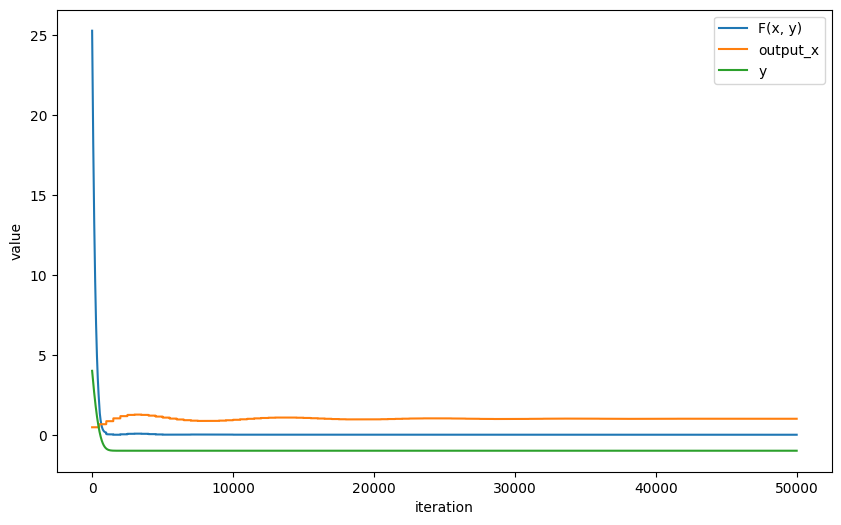

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(list_F_loss, label='F(x, y)')
plt.plot(list_output_x, label='output_x')  # Plotten Sie die Werte von output_x
plt.plot(list_y, label='y')  # Plotten Sie die Werte von y
plt.xlabel('iteration')
plt.ylabel('value')
plt.legend()
plt.show()